In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42) 

In [22]:
#read the data from movies on streaming platforms

stream_movies = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")

#convert rotten tomatoesstr to float
stream_movies['Rotten Tomatoes'] = stream_movies['Rotten Tomatoes'].str.rstrip('%').astype('float') / 100.0

In [23]:
stream_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   float64
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(3

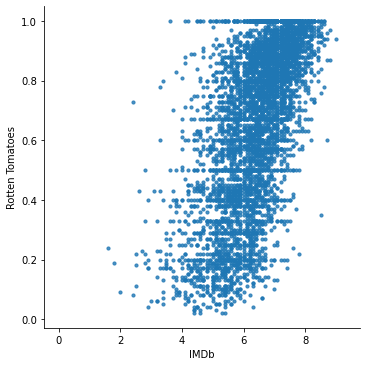

In [57]:
#scatter plot for imdb and rotten tomatoes rating in general

g = sns.lmplot(x="IMDb", y="Rotten Tomatoes", data=stream_movies,scatter_kws={"s": 10},fit_reg=False)


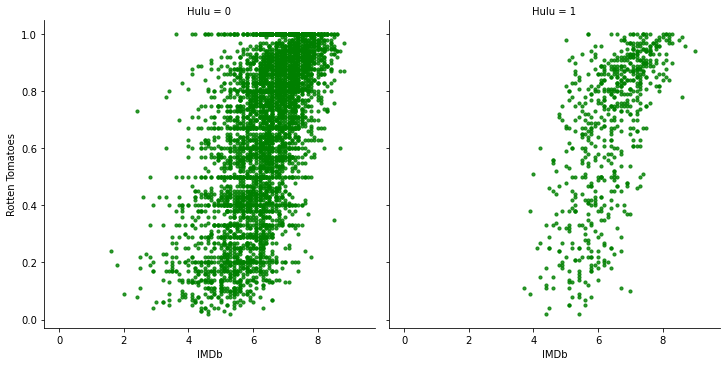

In [45]:
#scatter plot for imdb and rotten tomatoes rating on hulu

sns.lmplot(x="IMDb", y="Rotten Tomatoes", col='Hulu',data=stream_movies,
           scatter_kws={"color":"green","s": 10},fit_reg=False)

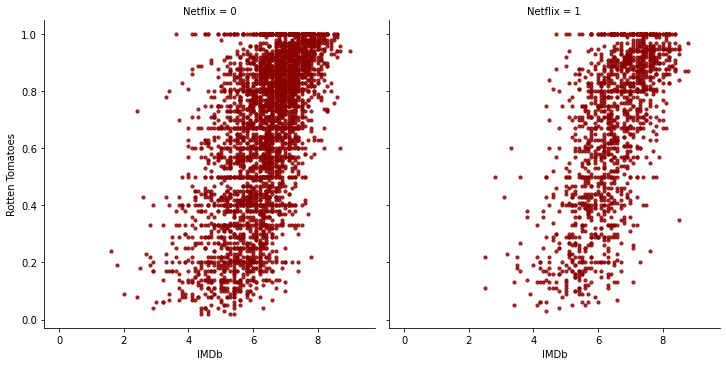

In [46]:
#scatter plot for imdb and rotten tomatoes rating on netflix
sns.lmplot(x="IMDb", y="Rotten Tomatoes", col='Netflix',data=stream_movies,scatter_kws={"color":"darkred","s": 10},fit_reg=False)

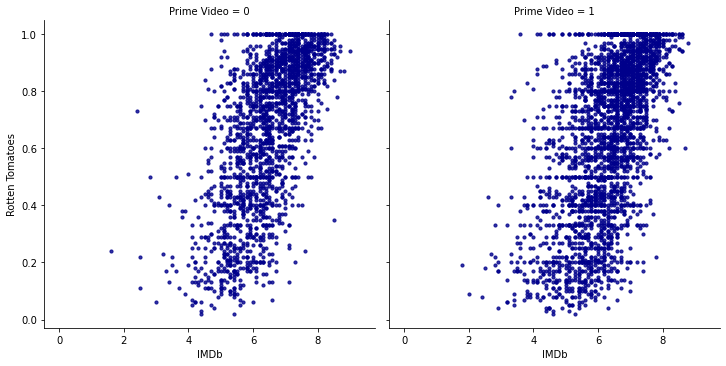

In [47]:
#scatter plot for imdb and rotten tomatoes rating on Prime Video

sns.lmplot(x="IMDb", y="Rotten Tomatoes", col='Prime Video',data=stream_movies,scatter_kws={"color":"darkblue","s": 10},fit_reg=False)

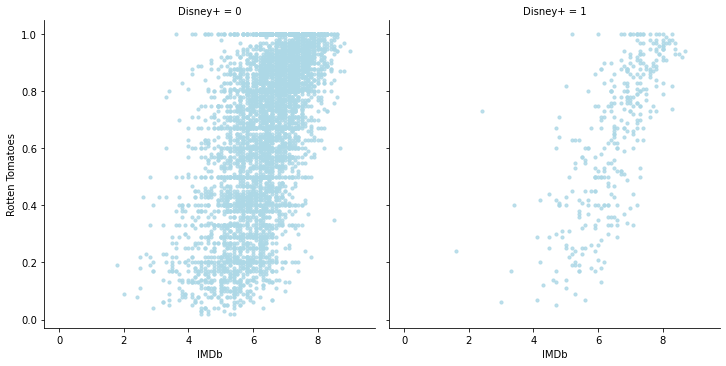

In [49]:
#scatter plot for imdb and rotten tomatoes rating on disney+

sns.lmplot(x="IMDb", y="Rotten Tomatoes", col='Disney+',data=stream_movies,scatter_kws={"color":"lightblue","s": 10},fit_reg=False)

In [87]:
#get the count of movies based on age for each platform

data_disney = stream_movies[stream_movies['Disney+']==1]
disney_age_count = np.array(data_disney['Age'].value_counts().sort_index())

data_Hulu = stream_movies[stream_movies['Hulu']==1]
Hulu_age_count = np.array(data_Hulu['Age'].value_counts().sort_index())

data_prime = stream_movies[stream_movies['Prime Video']==1]
prime_age_count = np.array(data_prime['Age'].value_counts().sort_index())


data_net = stream_movies[stream_movies['Netflix']==1]
net_age_count = np.array(data_net['Age'].value_counts().sort_index())

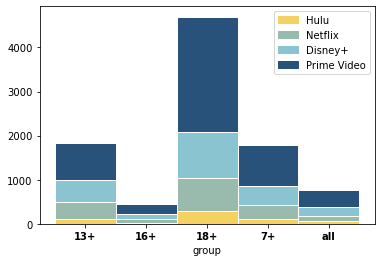

In [110]:
#stacked boxplot for age based on platform

from matplotlib import rc

# The position of the bars on the x-axis
pos = np.arange(5)

# Names of group and bar width
names = ['13+','16+','18+','7+','all']
barWidth = 1

#prime
plt.bar(pos, np.add(np.add(np.add(net_age_count,Hulu_age_count),disney_age_count), prime_age_count),
      color='#28527a', edgecolor='white', width=barWidth)

# disney
plt.bar(pos, np.add(np.add(net_age_count,Hulu_age_count),disney_age_count), 
       color='#8ac4d0', edgecolor='white', width=barWidth)

# netflix
plt.bar(pos, np.add(net_age_count,Hulu_age_count), color='#99bbad', edgecolor='white', width=barWidth)

# Hulu
plt.bar(pos, Hulu_age_count, color='#f4d160', edgecolor='white', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
#legend
colors = {'Hulu':'#f4d160', 'Netflix':'#99bbad','Disney+':'#8ac4d0','Prime Video':'#28527a'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
# Show graphic
plt.show()

<AxesSubplot:>

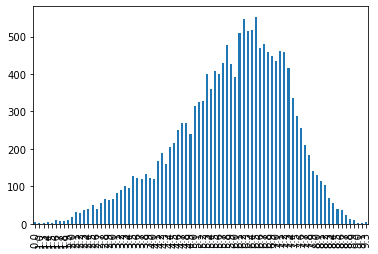

In [122]:
#IMDB rating based on platfrom

imdb_count = stream_movies['IMDb'].value_counts().sort_index()

imdb_count.plot.bar(x=None)


#iplot(kind="bar", color="Red", xTitle='IMDb Ratings', yTitle="Count of Movies", title = "Count of Movies vs IMDb Ratings")